In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mat4py import loadmat

In [2]:
# Read the data from .mat file
data = loadmat("/home/gmkim/Desktop/ML_Learning/ML_Assignments/PCA/ex7data1.mat")
df = pd.DataFrame(data['X'][:],columns=['x1','x2'])
print(df.head())
print(df.info())

         x1        x2
0  3.381563  3.389113
1  4.527875  5.854178
2  2.655682  4.411995
3  2.765235  3.715414
4  2.846560  4.175506
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      50 non-null     float64
 1   x2      50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes
None


In [3]:
n = len(df.index)
X = df.to_numpy()

In [4]:
mean1 = df["x1"].mean()
mean2 = df["x2"].mean()
arr = np.array([mean1, mean2])
mean_array = np.array([arr for i in range(n)])
print(mean_array)

[[3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]
 [3.98926528 5.00280585]


In [5]:
X_re = X - mean_array
print(X_re)

[[-0.60770261 -1.61369317]
 [ 0.5386101   0.85137225]
 [-1.33358341 -0.59081113]
 [-1.22403061 -1.2873922 ]
 [-1.14270518 -0.8272994 ]
 [-0.09859333  1.48557502]
 [-0.51346004 -1.36995709]
 [ 1.92203316  1.67796268]
 [-0.06037131  0.09564076]
 [ 0.57257008  0.62049344]
 [ 0.58480642  0.39484484]
 [ 0.38246828  0.45835964]
 [ 0.20242859 -0.04811226]
 [ 1.2548199  -0.34131818]
 [-1.15342508 -1.23478869]
 [ 1.64600441  1.30930853]
 [ 0.6970644   0.66243525]
 [-1.13875191 -0.37634958]
 [ 1.12089202  2.36039077]
 [ 1.19329849 -0.35629676]
 [ 1.71806281  1.6782341 ]
 [-0.4095807  -0.20002511]
 [ 1.65011245  1.11763009]
 [ 0.27420323 -0.31337689]
 [-1.45274835 -1.11831507]
 [-0.76543626 -0.06025   ]
 [ 0.94022273  0.95221386]
 [ 1.80369246  0.1055872 ]
 [-1.17241704 -0.18384816]
 [-0.10044114  0.09755979]
 [-0.64603109  0.8902076 ]
 [ 1.89046886  0.51861079]
 [-0.88534616 -1.14570343]
 [ 1.34224044 -0.3220635 ]
 [-0.61383841 -0.43742733]
 [ 0.7874136   1.25154454]
 [-1.31351898 -1.27183597]
 

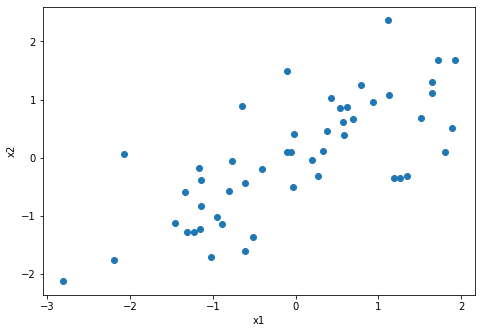

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(X_re[:,0],X_re[:,1])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

In [7]:
def cov_mat(X,n):
    cov_mat = (np.matmul(X.T,X)) / n
    
    return cov_mat

In [8]:
sigma = cov_mat(X_re,n)
print(sigma)

[[1.34852518 0.86535019]
 [0.86535019 1.02641621]]


In [9]:
evalue = np.linalg.eig(sigma)[0]
evalue_1 = evalue[0]
evalue_2 = evalue[1]
evector = np.linalg.eig(sigma)[1]
evector_1 = evector[:,0]
evector_2 = evector[:,1]
print(evector)
print(evalue_1)
print(evalue_2)
print(evector_1)
print(evector_2)

[[ 0.76908153 -0.63915068]
 [ 0.63915068  0.76908153]]
2.067680615992352
0.3072607762413456
[0.76908153 0.63915068]
[-0.63915068  0.76908153]


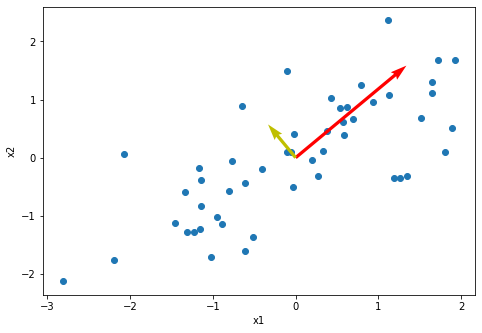

In [10]:
# Plot e-vectors on the figure
origin = [0,0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(X_re[:,0],X_re[:,1])
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.quiver(*origin,*evector_1, color="r", scale=3)
ax.quiver(*origin,*evector_2, color="y", scale=10)

plt.show()

In [11]:
U, S, V = np.linalg.svd(X_re)
print("U Matrix : ", U)
print("S Matrix : ", S)
print("V Matrix : ", V)

U Matrix :  [[-0.14740326  0.21753606 -0.14652229 ... -0.19268034 -0.02076673
   0.14456323]
 [ 0.09425744 -0.07922338 -0.0837686  ... -0.3352168   0.09829793
  -0.05031898]
 [-0.13800946 -0.10153631  0.96994811 ... -0.05868388  0.0051223
   0.01832722]
 ...
 [-0.15230486 -0.35099511 -0.0639443  ...  0.844189    0.02604669
   0.02071472]
 [-0.03384479  0.09206589  0.00769737 ...  0.03017854  0.99127302
   0.00425505]
 [ 0.15340464 -0.02830655  0.01521929 ...  0.01143763  0.0063552
   0.97991733]]
S Matrix :  [10.1677938   3.91957125]
V Matrix :  [[ 0.76908153  0.63915068]
 [ 0.63915068 -0.76908153]]


In [12]:
svd_evector_1 = V[:,0]
svd_evector_2 = V[:,1]
print(svd_evector_1)
print(svd_evector_2)

[0.76908153 0.63915068]
[ 0.63915068 -0.76908153]


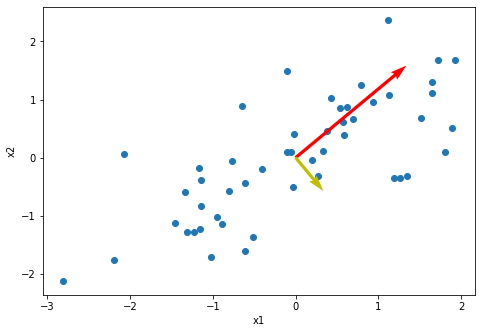

In [13]:
# Plot e-vectors on the figure
origin = [0,0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(X_re[:,0],X_re[:,1])
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.quiver(*origin,*svd_evector_1, color="r", scale=3)
ax.quiver(*origin,*svd_evector_2, color="y", scale=10)

plt.show()

In [15]:
def projection(v,lv):
    lv_norm = np.sqrt(sum(lv**2))
    vprime = (np.dot(v,lv)/lv_norm**2)*lv
    return vprime

In [16]:
proj_arr = np.array([[]])
for i in range(n):
    proj = projection(X_re[i],evector_1)
    proj_arr = np.append(proj_arr,proj)
proj_arr = np.reshape(proj_arr,(n,2))
print(proj_arr)

[[-1.15267321 -0.95793728]
 [ 0.73708023  0.61255577]
 [-1.07921498 -0.89688929]
 [-1.35682667 -1.12760046]
 [-1.08256103 -0.89967005]
 [ 0.67193114  0.55841316]
 [-0.97711935 -0.81204199]
 [ 1.96167412  1.63026324]
 [ 0.01130426  0.00939449]
 [ 0.64367655  0.53493198]
 [ 0.53999458  0.44876634]
 [ 0.45153559  0.37525186]
 [ 0.09608375  0.07985108]
 [ 0.57443089  0.47738488]
 [-1.28920673 -1.07140443]
 [ 1.61719161  1.34397859]
 [ 0.73793012  0.61326208]
 [-0.85855429 -0.71350765]
 [ 1.82326369  1.51523626]
 [ 0.53067896  0.44102452]
 [ 1.84116185  1.53011066]
 [-0.34058556 -0.28304605]
 [ 1.5254002   1.26769469]
 [ 0.00814426  0.00676834]
 [-1.40899873 -1.17095842]
 [-0.48236157 -0.40087002]
 [ 1.02419824  0.85116724]
 [ 1.11876191  0.92975505]
 [-0.78384096 -0.65141661]
 [-0.01145318 -0.00951825]
 [ 0.05547094  0.04609952]
 [ 1.37311442  1.14113651]
 [-1.08685103 -0.90323529]
 [ 0.63560376  0.52822303]
 [-0.57809841 -0.4804328 ]
 [ 1.08095241  0.89833319]
 [-1.40211102 -1.16523434]
 

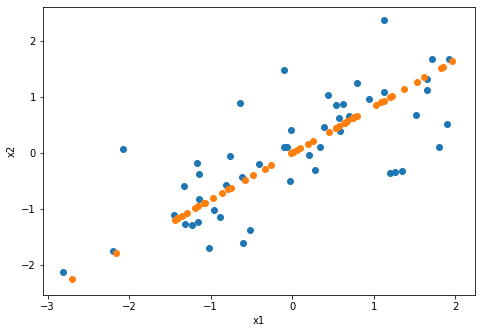

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(X_re[:,0],X_re[:,1])
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.scatter(proj_arr[:,0],proj_arr[:,1])

plt.show()

In [46]:
# Unsupervised Learning, PCA with Scikit-learn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
# Loading datasets
cancer = load_breast_cancer()
cancer.keys()

df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# Scaled data
## PCA is sensitive at the scale of given data.
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [37]:
scaled_data = scaler.transform(df)

In [41]:
# Applying PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [42]:
X_pca = pca.transform(scaled_data)
print("Before PCA : ", scaled_data.shape)
print("After PCA : ", X_pca.shape)

Before PCA :  (569, 30)
After PCA :  (569, 2)


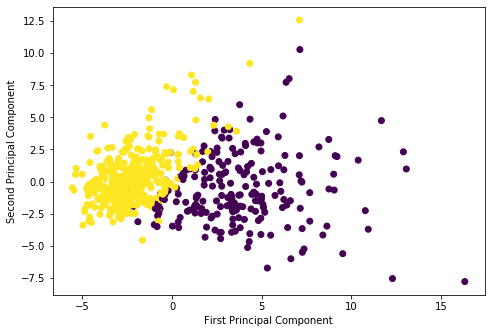

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(X_pca[:,0],X_pca[:,1],c=cancer["target"])
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")

plt.show()